In [1]:
from data import iid
from network import teacher, student, base, ensemble
from solver import rl_solver

import numpy as np
import torch.nn as nn
import torch


import matplotlib.pyplot as plt

In [7]:
D = 500
iid_rl = iid.IIDRLTask(batch_size= 512, seq_len = 12, input_dim = D)
teacher_net = teacher.ContinuousTeacher(input_dimension = D, hidden_dimensions=[1], nonlinearity = 'sign')
student_net = student.ContinuousStudent(input_dimension=D, hidden_dimensions=[1], nonlinearity = 'scaled_sigmoid')

In [8]:
rl_solver_test = rl_solver.RLPerceptronSolver(criterion = nn.MSELoss(), logdir = '.', optimizer_type = 'sgd', 
                                              lr = 0.01, weight_decay =0, teacher_network = teacher_net, student_network = student_net
                                             )

In [9]:
rl_solver_test.train(num_iter = 1000, data_loader = iid_rl)

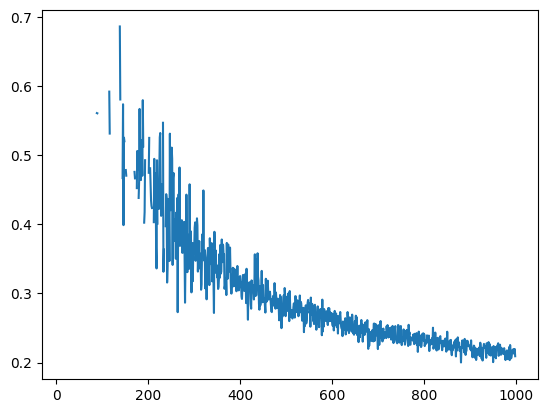

In [10]:
plt.plot(rl_solver_test.history['loss'])

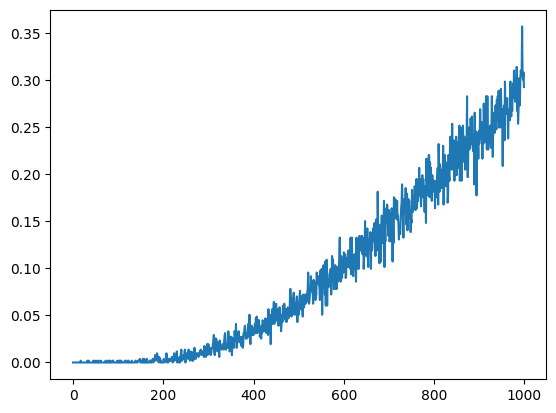

In [11]:
plt.plot(rl_solver_test.history['exp_reward_rate'])